# Sensitivity Analysis of RT for Cf-252

In [1]:
import numpy as np
import scipy as sp
import os
from statistics import *
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import sympy as sym
from sympy.interactive import printing
printing.init_printing(use_latex = 'mathjax')
from IPython.display import display, Math, Latex
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
%matplotlib inline

In [2]:
### rcParams are the default parameters for matplotlib
import matplotlib as mpl

print ("Matplotbib Version: ", mpl.__version__)

mpl.rcParams['font.size'] = 18
mpl.rcParams['font.family'] = 'Helvetica', 'serif'
#mpl.rcParams['font.color'] = 'darkred'
mpl.rcParams['font.weight'] = 'normal'

mpl.rcParams['axes.labelsize'] = 18.
mpl.rcParams['xtick.labelsize'] = 18.
mpl.rcParams['ytick.labelsize'] = 18.
mpl.rcParams['lines.linewidth'] = 2.

font = {'family' : 'serif',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 18,
        }

mpl.rcParams['xtick.major.pad']='10'
mpl.rcParams['ytick.major.pad']='10'

mpl.rcParams['image.cmap'] = 'inferno'

Matplotbib Version:  2.0.2


In [3]:
import json

#-- Read JSON-formatted data file
def readJSONDataFile (filename):
    
    with open(filename) as jsonFile:
        jsonData = json.load(jsonFile)
        
    exp = list()
    c=0
    for item in jsonData.get("entries"):
        exp.append(item)
        c=c+1
        
    return exp

#-- Plot experimental data sets corresponding to a particular quantity
def plotExperimentalData (quantity, **keyword_parameters):
    if ('format' in keyword_parameters):
        fmtplot = keyword_parameters['format']
    else:
        fmtplot = 'ko--'

    checkAuthor = False
    if ('author' in keyword_parameters):
        author = keyword_parameters['author']
        checkAuthor = True
    for exp in experiments:
        if (exp['quantity']==quantity):
            if (checkAuthor):
                if (author not in exp['authors']):
                    continue
            data = np.asarray(exp['data'])
            if ('renorm' in exp):
                coef = exp['renorm']
            else:
                coef = 1.0
            x = data[:,0]
            y = data[:,1]
            if ('label' in keyword_parameters):
                labelplot = keyword_parameters['label']
            else:
                labelplot = exp['label']
            plt.plot(x,y*coef,fmtplot,alpha=0.5,label=labelplot)

#-- Lists all experiments read in 
def listExperimentalData (experiments):
    for exp in experiments:
        print ("{0:10s} |  {1}, {2}".format(exp['quantity'], exp['authors'], exp['year']))
        

In [4]:
EXPERIMENTALDATAFILE = "/home/austinlc/Documents/FromPTalou/expdata-98252sf.js"

experiments = readJSONDataFile (EXPERIMENTALDATAFILE)

for exp in experiments:
    print ("{0:20s} |  {1}, {2}".format(exp['quantity'], exp['authors'], exp['year']))

YA                   |  F.-J. Hambsch, S. Oberstedt, P. Siegler, J. van Arle, R. Vogt, 1997
YA                   |  C. Budtz-Joergensen and H.-H. Knitter, 1988
YA                   |  A. Gook, F.-J. Hambsch, M. Vidali, 2014
YA                   |  Sh. Zeynalov, F.-J.Hambsch, et al., 2011
YZ                   |  Wahl, 1987
TKEA                 |  Gook, 2014
SIGTKEA              |  A. Gook et al., 2014
Pnu                  |  P. Santi and M. Miller, 2008
PFNS                 |  W. Mannhart, 1989
PFNS2                |  W. Mannhart, 1989
nubarA               |  Vorobyev et al., 2004
EcmA                 |  Budtz-Jorgensen and Knitter, 1988
nubarTKE             |  A. Gook, F.-J. Hambsch, M. Vidali, 2014
nubarTKE_A110        |  A. Gook, F.-J. Hambsch, M. Vidali, 2014
nubarTKE_A122        |  A. Gook, F.-J. Hambsch, M. Vidali, 2014
nubarTKE_A130        |  A. Gook, F.-J. Hambsch, M. Vidali, 2014
nubarTKE_A142        |  A. Gook, F.-J. Hambsch, M. Vidali, 2014
nLF                  |  A. Skarsvag

['histories-vectors.CGMF252CfRT100', 'histories-vectors.CGMF252CfRT110', 'histories-vectors.CGMF252CfRT120', 'histories-vectors.CGMF252CfRT130', 'histories-vectors.CGMF252CfRT140', 'histories-vectors.CGMF252CfRT150', 'histories-vectors.CGMF252CfRT50', 'histories-vectors.CGMF252CfRT60', 'histories-vectors.CGMF252CfRT70', 'histories-vectors.CGMF252CfRT80', 'histories-vectors.CGMF252CfRT90']
1.0
4.04728125


/home/austinlc/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/austinlc/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


1.1
4.046953125
1.2
4.024875
1.3
4.008265625
1.4
3.983921875
1.5
3.9573125
0.5
3.88990625
0.6
3.983125
0.7
4.020171875
0.8
4.038640625
0.9
4.0596875


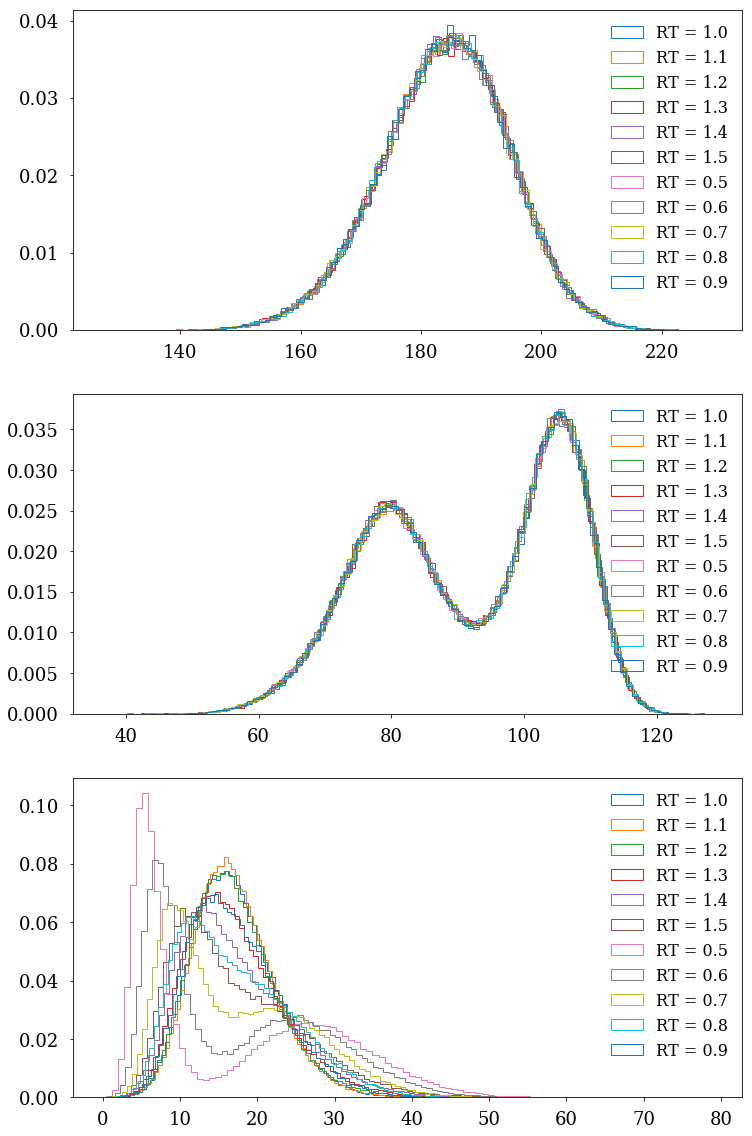

In [5]:
# Special Axis-Sharing Plot

fig, axHist = plt.subplots(figsize=(12,20))

filepath = os.path.join(os.getcwd(),'DATA','Cf252RTFiles64')

if not os.path.isdir(filepath):
    raise ValueError('You do not have the directory "RTFiles" in your current working directory')

print(sorted(os.listdir(filepath)))
files = sorted(os.listdir(filepath))

nnt_mean = []
nn2t_mean = []
nn3t_mean = []
ngt_mean = []
ng2t_mean = []
ng3t_mean = []
TKE_mean = []
TXE_mean = []
Enlab_mean = []
Eglab_mean = []
nhist_arr   = []
RT_arr = []

masses = np.linspace(80,170,91)
nuA = np.zeros([len(files), len(masses)])
nugA = np.zeros([len(files), len(masses)])

TKE_Spread = np.linspace(130,240,220)
nuTKE = np.zeros([len(files), len(TKE_Spread)])
nugTKE = np.zeros([len(files), len(TKE_Spread)])

Pnubins=np.linspace(0,10,11)
h = np.zeros([len(files), len(Pnubins) -1])

file_index = 0

for filename in files:
    
    RT = float(filename[filename.index('RT')+2:])/100
    RT_arr.append(RT)

    n_histories = 30000
    nhist_arr.append(n_histories)

    file_loc = os.path.join(filepath,filename)
    working_file = open(file_loc)
    
    # read first line -----------------------------------------------------------------------------------------------
    line = working_file.readline()
    if (line.find("#")!=0):
        sys.exit("ERROR: FIRST LINE OF OUTPUT FILE SHOULD CONTAIN '#'")
        
    # read remainder -----------------------------------------------------------------------------------------------
    nfragments = 0
    
    # re-initialize all arrays
    # Line 1 Arrays of interest
    Al, Ah, A        = [], [], []
    Zl, Zh, Z        = [], [], []
    Ul, Uh, TXE      = [], [], []
#     Jl, Jh, J        = [], [], []
    KEl, KEh, TKE    = [], [], []
    nnl, nnh, nnt    = [], [], []
    ngl, ngh, ngt    = [], [], []

    # Direction/momentum vectors are arranged with CoM first, then Lab
    # Fragment momentum arrays - Line 2
    #Pcml, Pcmh       = [], []
    #Plabl, Plabh     = [], []
    
    # For now, just save the resulting particle energies
    # Neutron Energies - Line 3
    Encml, Encmh     = [], []
    Enlabl, Enlabh   = [], []
    
    # Gamma Energies - Line 4
    Egcml, Egcmh     = [], []
    Eglabl, Eglabh   = [], []
    
    while True:
        line = working_file.readline()
        if (len(line)==0):
            break
        #LINE ONE OF FISSION EVENT (A, Z, U, J, P, KE, nn, ng, nIC)
        nfragments+=1
        tempdata1 = line.split()
        if (nfragments % 2 == 1): # LIGHT FRAGMENT
            Al.append(int(tempdata1[0]))
            Zl.append(int(tempdata1[1]))
            Ul.append(float(tempdata1[2]))
#             Jl.append(float(tempdata1[3]))
            KEl.append(float(tempdata1[5]))
            nnl.append(int(tempdata1[6]))
            ngl.append(int(tempdata1[7]))

        else: # HEAVY FRAGMENT
            Ah.append(int(tempdata1[0]))
            Zh.append(int(tempdata1[1]))
            Uh.append(float(tempdata1[2]))
#             Jh.append(float(tempdata1[3]))
            KEh.append(float(tempdata1[5]))
            nnh.append(int(tempdata1[6]))
            ngh.append(int(tempdata1[7]))

        
        #LINE TWO OF FISSION EVENT (momentum vector in Lab and center of mass of FRAGMENT)
        line = working_file.readline()
        tempdata2 = line.split()
        # for now, don't worry about line 2
        
        #LINE THREE OF FISSION EVENT (Neutron direction cosines and energies, Lab and center of mass respectively)
        if (int(tempdata1[6]) != 0):
            line = working_file.readline()
            tempdata3 = line.split()
            if (nfragments % 2 == 1): # LIGHT FRAGMENT
                for i in range(int(tempdata1[6])):
                    Encml.append(float(tempdata3[4*i + 7]))
                    Enlabl.append(float(tempdata3[8*i + 7]))
            else: # HEAVY FRAGMENT
                for i in range(int(tempdata1[6])):
                    Encmh.append(float(tempdata3[4*i + 7]))
                    Enlabh.append(float(tempdata3[8*i + 7]))
            
        
        #LINE FOUR OF FISSION EVENT (Gamma direction cosines and energies, Lab and center of mass respectively)
        if (int(tempdata1[7]) != 0):
            line = working_file.readline()
            tempdata4 = line.split()
            if (nfragments % 2 == 1): # LIGHT FRAGMENT
                for i in range(int(tempdata1[7])):
                    Egcml.append(float(tempdata4[4*i + 7]))
                    Eglabl.append(float(tempdata4[8*i + 7]))
            else: # HEAVY FRAGMENT
                for i in range(int(tempdata1[7])):
                    Egcmh.append(float(tempdata4[4*i + 7]))
                    Eglabh.append(float(tempdata4[8*i + 7]))
        
#         if (nfragments>=MaxHistories*2):
#             break
#     nhistories = nfragments/2
    
    # Concatenate arrays
    A = np.concatenate([Al, Ah])
    Z = np.concatenate([Zl, Zh])

    TXE    = np.sum([Ul , Uh], axis=0)
#     J      = Jl + Jh
    TKE    = np.sum([KEl , KEh], axis=0)
    nn     = np.concatenate([nnl , nnh])
    nnt    = np.sum([nnl , nnh], axis=0)
    nn2t   = [float(nnt[i] * (nnt[i]-1)) for i in range(len(nnt))] # 2nd factorial moment
    nn3t   = [float(nnt[i] * (nnt[i]-1) * (nnt[i]-2)) for i in range(len(nnt))] # 3rd factorial moment
    ng     = np.concatenate([ngl , ngh])
    ngt    = np.sum([ngl , ngh], axis=0)
    ng2t   = [float(ngt[i] * (ngt[i]-1)) for i in range(len(ngt))]
    ng3t   = [float(ngt[i] * (ngt[i]-1) * (ngt[i]-2)) for i in range(len(ngt))]
    Encm  = Encml + Encmh
    Egcm  = Egcml + Egcmh
    Enlab = Enlabl + Enlabh
    Eglab = Eglabl + Eglabh
    
    # Close File that is read
    working_file.close()
    
    print(RT)
    print(mean(nnt.astype(float)))
    
    nnt_mean.append(mean(nnt.astype(float)))
    ngt_mean.append(mean(ngt.astype(float)))
    TKE_mean.append(mean(TKE.astype(float)))
    TXE_mean.append(mean(TXE.astype(float)))
    Enlab_mean.append(mean(Enlab))
    Eglab_mean.append(mean(Eglab))
    nn2t_mean.append(mean(nn2t))
    nn3t_mean.append(mean(nn3t))
    ng2t_mean.append(mean(ng2t))
    ng3t_mean.append(mean(ng3t))
    
    # Make a histogram plot each iteration
    plt.subplot(3,1,1)
    plt.hist(TKE, bins=100, histtype = 'step', label = 'RT = {}'.format(RT), normed = True)
    lg = plt.legend(numpoints=1,fontsize=16,loc='best')
    lg.draw_frame(False)
    plt.subplot(3,1,2)
    plt.hist((KEl+KEh), bins=100, histtype = 'step', label = 'RT = {}'.format(RT), normed = True)
    lg = plt.legend(numpoints=1,fontsize=16,loc='best')
    lg.draw_frame(False)
    plt.subplot(3,1,3)
    plt.hist((Ul+Uh), bins=100, histtype = 'step', label = 'RT = {}'.format(RT), normed = True)
    lg = plt.legend(numpoints=1,fontsize=16,loc='best')
    lg.draw_frame(False)
    
    #make nu(A) nu_gamma(A) for each value of RT
    c=0
    for Ai in masses:
        nuA[file_index][c]   = np.mean(nn[A==Ai])
        nugA[file_index][c]  = np.mean(ng[A==Ai])
        c = c+1
    
    d = 0
    for TKEi in TKE_Spread[:-1]:
        TKE_next = TKE_Spread[d+1]
        nuTKE[file_index][d]   = np.mean(nnt[np.logical_and(TKE>=TKEi, TKE<=TKE_next)])
        nugTKE[file_index][d]  = np.mean(ngt[np.logical_and(TKE>=TKEi, TKE<=TKE_next)])
        d = d+1
        
    #make p_nu
    h[file_index][:], binEdges = np.histogram(nnt,bins=Pnubins,normed=True)
    binCenters = binEdges[:-1]

    file_index += 1

[-0.02704471  8.97666588]


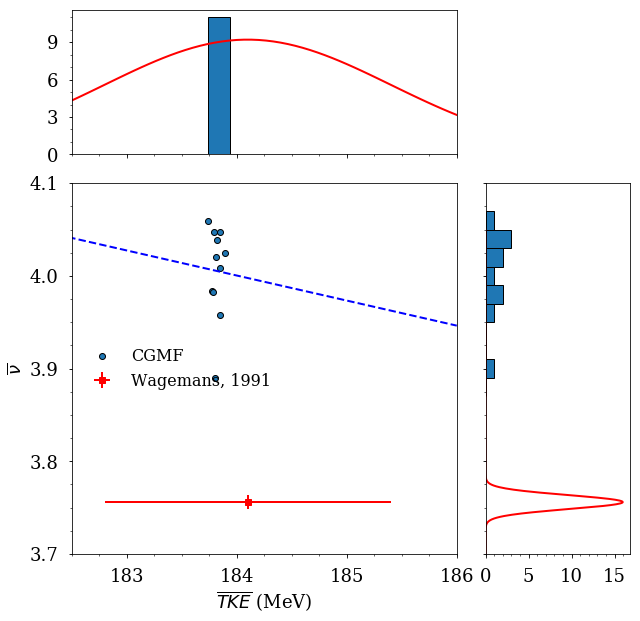

In [6]:
# Special Axis-Sharing Plot

fig, axScatter = plt.subplots(figsize=(10,10))

# the scatter plot:
sz = 8
axScatter.scatter(TKE_mean, nnt_mean, edgecolor='k',label="CGMF")
axScatter.set_aspect('auto')
axScatter.set_xlabel(r"$\overline{TKE}$ (MeV)")
axScatter.set_ylabel(r'$\overline{\nu}$')
axScatter.xaxis.set_major_locator(ticker.MultipleLocator(1))
axScatter.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
axScatter.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
axScatter.yaxis.set_minor_locator(ticker.MultipleLocator(0.025))

fit = np.polyfit(TKE_mean,nnt_mean,1)
print (fit)
fitfun = np.poly1d(fit)
x=np.linspace(182,186,61)
axScatter.plot(x,fitfun(x),'b--')
axScatter.errorbar(184.1,3.756,xerr=1.3,yerr=0.002*3.756,fmt='rs',label='Wagemans, 1991') #-- experimental point
lg = plt.legend(numpoints=1,fontsize=16,loc='center left')
lg.draw_frame(False)

# create new axes on the right and on the top of the current axes
# The first argument of the new_vertical(new_horizontal) method is
# the height (width) of the axes to be created in inches.
divider = make_axes_locatable(axScatter)
axHistx = divider.append_axes("top", 2., pad=0.4, sharex=axScatter)
axHisty = divider.append_axes("right", 2., pad=0.4, sharey=axScatter)

# make some labels invisible
plt.setp(axHistx.get_xticklabels() + axHisty.get_yticklabels(),
         visible=False)

# now determine nice limits by hand:
xbinwidth = 0.2
ybinwidth = 0.02

xbins = np.arange(np.min(TKE_mean) - xbinwidth, np.max(TKE_mean) + xbinwidth, xbinwidth)
ybins = np.arange(np.min(nnt_mean) - ybinwidth, np.max(nnt_mean) + ybinwidth, ybinwidth)

axHistx.hist(TKE_mean, bins=xbins,edgecolor = 'k')
axHisty.hist(nnt_mean, bins=ybins, orientation='horizontal',edgecolor = 'k')

mean_TKE_exp = 184.1
sig_TKE_exp  = 1.3
axHistx.plot(x,30*mlab.normpdf(x, mean_TKE_exp, sig_TKE_exp), 'r')

mean_nu_exp  = 3.756
sig_nu_exp   = 0.002*3.756
y        = np.linspace(3.6,4.05,1000)
plt.plot(0.3*mlab.normpdf(y, mean_nu_exp, sig_nu_exp), y, 'r')

# the xaxis of axHistx and yaxis of axHisty are shared with axScatter,
# thus there is no need to manually adjust the xlim and ylim of these
# axis.

#axHistx.axis["bottom"].major_ticklabels.set_visible(False)
for tl in axHistx.get_xticklabels():
    tl.set_visible(False)
axHistx.yaxis.set_major_locator(ticker.MultipleLocator(3))
axHistx.yaxis.set_minor_locator(ticker.MultipleLocator(1))

#axHisty.axis["left"].major_ticklabels.set_visible(False)
for tl in axHisty.get_yticklabels():
    tl.set_visible(False)
axHisty.xaxis.set_major_locator(ticker.MultipleLocator(5))
axHisty.xaxis.set_minor_locator(ticker.MultipleLocator(1))

axScatter.set_ylim([3.7, 4.1])
axScatter.set_xlim([182.5, 186.])

plt.draw()
plt.show()

In [7]:
print(len(TKE_mean))
for i in range(len(TKE_mean)):
    print(str(TKE_mean[i]) + ', ' + str(nnt_mean[i]) + '\n')

11
183.846206344, 4.04728125

183.790173563, 4.046953125

183.893300422, 4.024875

183.848979937, 4.008265625

183.7762645, 3.983921875

183.848142141, 3.9573125

183.799656656, 3.88990625

183.783480703, 3.983125

183.811398672, 4.020171875

183.820827672, 4.038640625

183.736482406, 4.0596875



[-0.50484229  1.03370589  3.52708796]


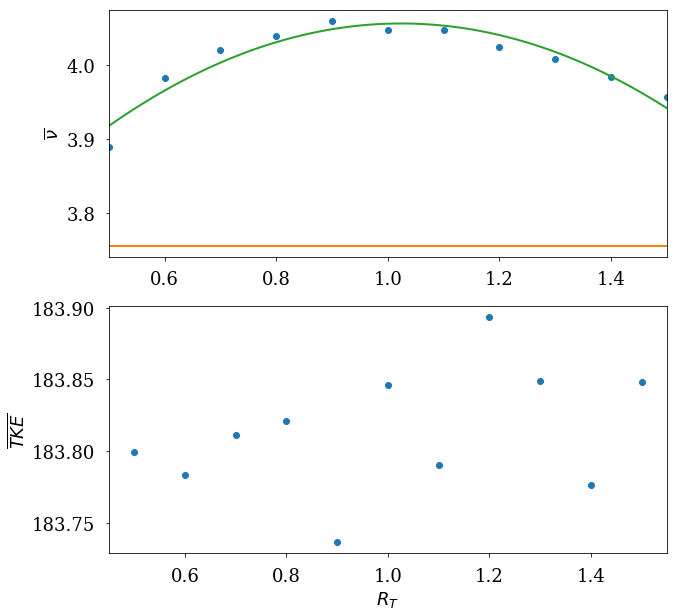

In [8]:
fig = plt.subplots(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(RT_arr, nnt_mean,'o')
plt.ylabel(r'$\overline{\nu}$')
plt.xlim(0.5,1.5)
plt.plot([0.5, 1.5], [3.756, 3.756])
x = np.linspace(0.5,1.5,101)
z = np.polyfit(RT_arr, nnt_mean, 2)
print(z)
p = np.poly1d(z)
plt.plot(x, p(x),'-')

plt.subplot(2,1,2)
plt.plot(RT_arr,TKE_mean,'o')
plt.ylabel(r'$\overline{TKE}$')
plt.xlabel(r'$R_{T}$')

[-0.16906687  0.31550306  9.21171056]


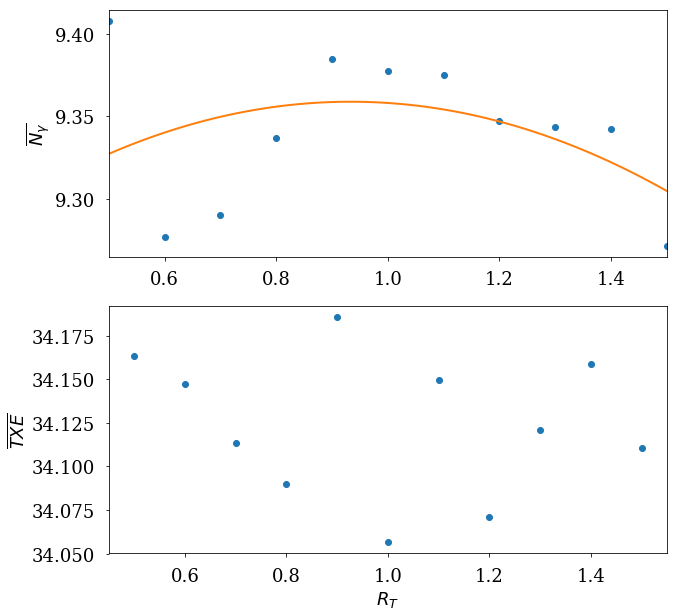

In [9]:
fig = plt.subplots(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(RT_arr, ngt_mean,'o')
plt.ylabel(r'$\overline{N_{\gamma}}$')
plt.xlim(0.5,1.5)
x = np.linspace(0.5,1.5,100)
z = np.polyfit(RT_arr, ngt_mean, 2)
print(z)
p = np.poly1d(z)
plt.plot(x, p(x))

plt.subplot(2,1,2)
plt.plot(RT_arr,TXE_mean,'o')
plt.ylabel(r'$\overline{TXE}$')
plt.xlabel(r'$R_{T}$')

## Plot of $\overline{\nu}(A)$ and $\overline{N_{\gamma}}(A)$

(60, 170)

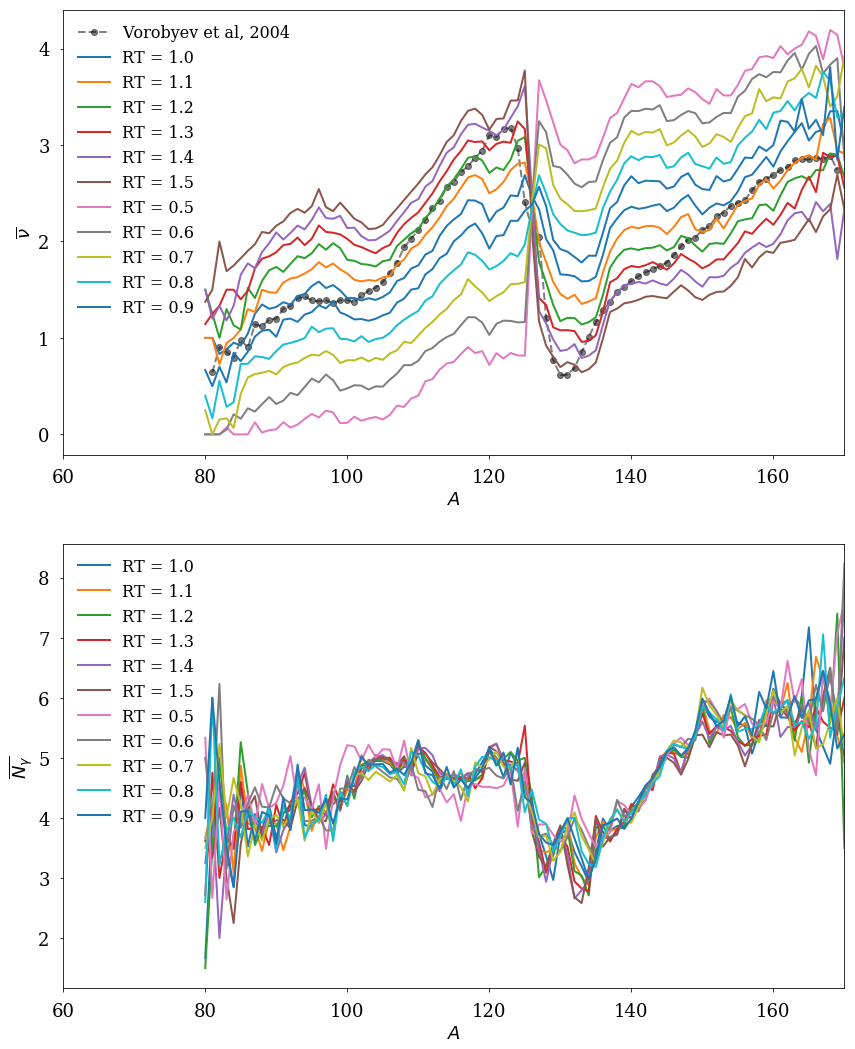

In [10]:
fig = plt.subplots(figsize=(14,18))
plt.subplot(2,1,1)
plotExperimentalData ('nubarA')
for i in range(file_index):
    plt.plot(masses, nuA[i],'-', label = 'RT = {}'.format(RT_arr[i]))
plt.xlabel(r'$A$')
plt.ylabel(r'$\overline{\nu}$')
lg = plt.legend(numpoints=1,fontsize=16,loc='best')
lg.draw_frame(False)
plt.xlim(60,170)

plt.subplot(2,1,2)
for i in range(file_index):
    plt.plot(masses, nugA[i],'-', label = 'RT = {}'.format(RT_arr[i]))
plt.ylabel(r'$\overline{N_{\gamma}}$')
plt.xlabel(r'$A$')
lg = plt.legend(numpoints=1,fontsize=16,loc='best')
lg.draw_frame(False)
plt.xlim(60,170)

## Plot of $\overline{\nu}(TKE)$ and $\overline{N_{\gamma}}(TKE)$

(5, 20)

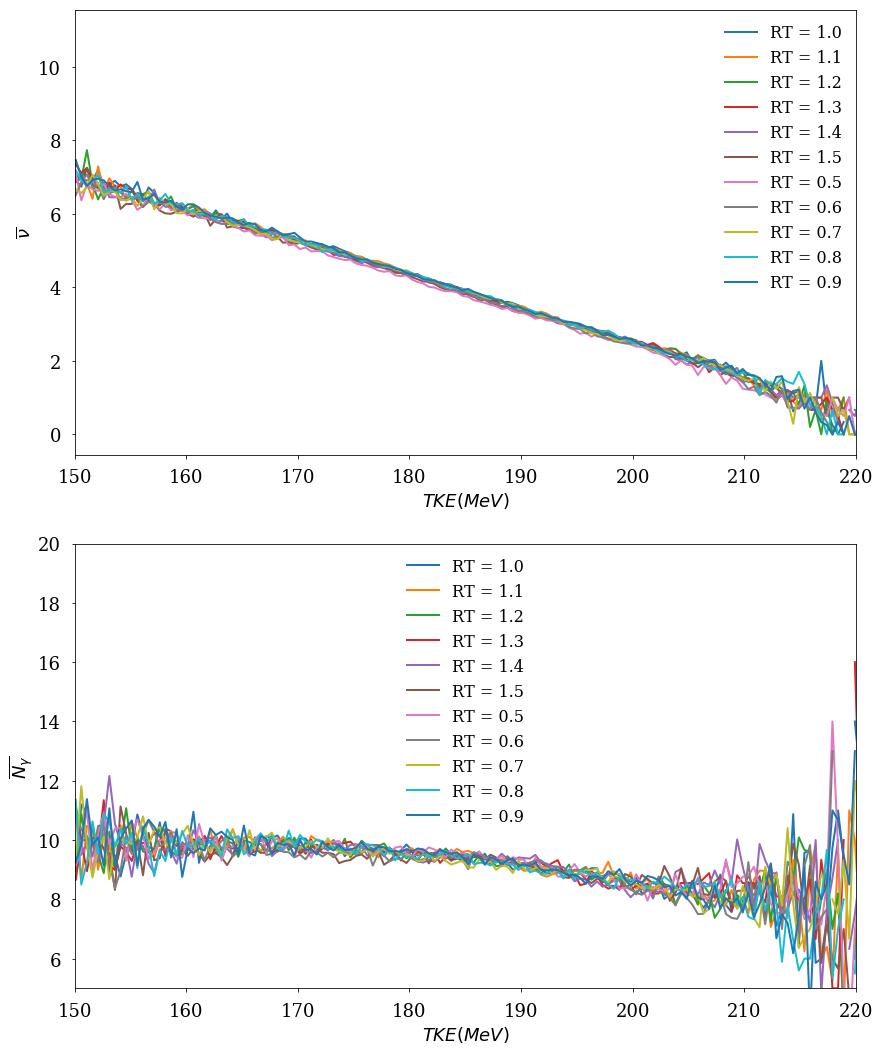

In [11]:
fig = plt.subplots(figsize=(14,18))
plt.subplot(2,1,1)
for i in range(file_index):
    plt.plot(TKE_Spread, nuTKE[i],'-', label = 'RT = {}'.format(RT_arr[i]) )
plt.ylabel(r'$\overline{\nu}$')
plt.xlabel(r'$TKE (MeV)$')
lg = plt.legend(numpoints=1,fontsize=16,loc='best')
lg.draw_frame(False)
plt.xlim(150,220)

plt.subplot(2,1,2)
for i in range(file_index):
    plt.plot(TKE_Spread, nugTKE[i],'-', label = 'RT = {}'.format(RT_arr[i]))
plt.ylabel(r'$\overline{N_{\gamma}}$')
plt.xlabel(r'$TKE (MeV)$')
lg = plt.legend(numpoints=1,fontsize=16,loc='best')
lg.draw_frame(False)
plt.xlim(150,220)
plt.ylim(5,20)

3.756

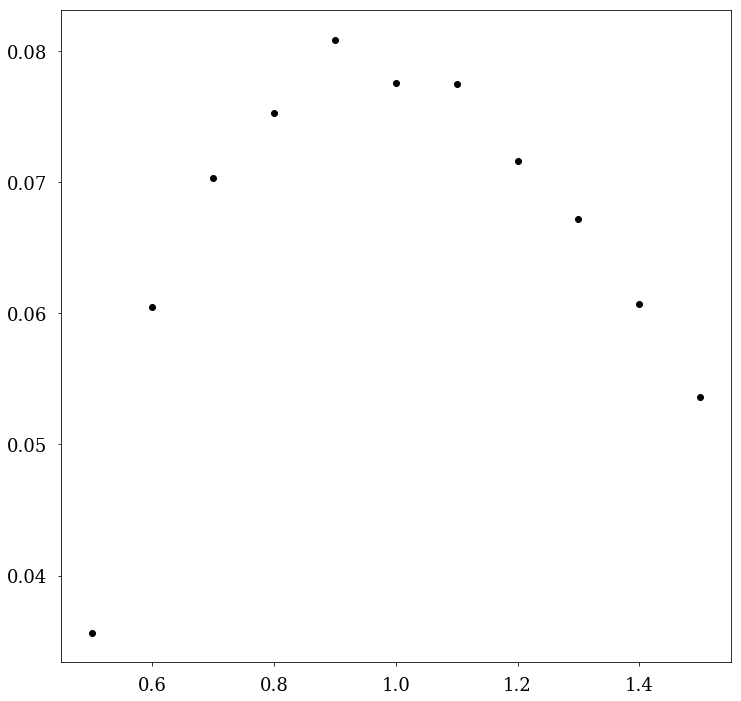

In [12]:
fig = plt.subplots(figsize=(12,12))
for i in range(len(RT_arr)):
    FOM = np.abs(nnt_mean[i] - mean_nu_exp) / mean_nu_exp
    plt.plot(RT_arr[i], FOM, 'ko')
mean_nu_exp

## Prompt  Fission Neutrons
#### Prompt Fission Neutron Multiplicity Distribution $P(\nu)$

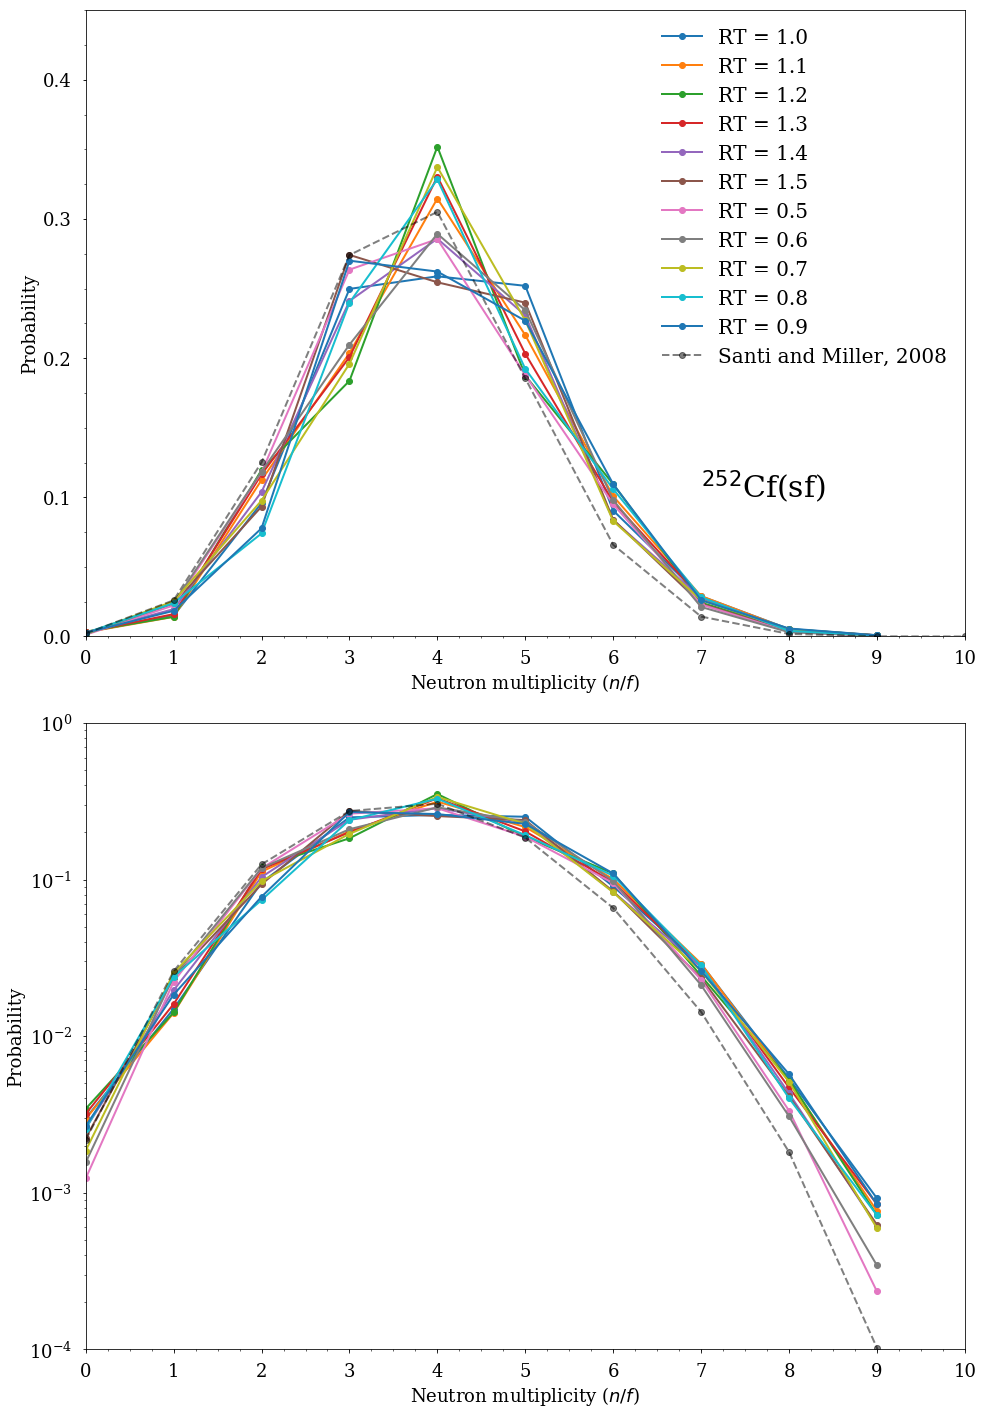

In [13]:
fig = plt.subplots(figsize=(14,20))
REACTIONLABEL = r"$^{252}$Cf(sf)"

#-- lin-scale
ax1 = plt.subplot(2,1,1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.025))

for i in range(file_index):
    plt.plot(binCenters,h[i],'o-', label = 'RT = {}'.format(RT_arr[i]))
plotExperimentalData ('Pnu')

plt.xlabel("Neutron multiplicity ($n/f$)")
plt.ylabel("Probability")
plt.xlim(0,10)
plt.ylim(0.0,0.45)
lg = plt.legend(numpoints=1,fontsize=20)
lg.draw_frame(False)

plt.text(7,0.1,REACTIONLABEL,fontsize=30)

#-- log-scale
ax2 = plt.subplot(2,1,2,sharex=ax1)

for i in range(file_index):
    plt.plot(binCenters,h[i],'o-', label = 'RT = {}'.format(RT_arr[i]))
plotExperimentalData ('Pnu')

plt.xlabel("Neutron multiplicity ($n/f$)")
plt.ylabel("Probability")
plt.xlim(0,10)
plt.ylim(1e-4,1)
plt.yscale('log')

#lg = plt.legend(loc=3,numpoints=1,fontsize=20)
#lg.draw_frame(False)

plt.tight_layout()
plt.show()


In [14]:
print(h)
print(binCenters)

[[  2.98437500e-03   1.49687500e-02   9.59375000e-02   2.49718750e-01
    2.58781250e-01   2.51937500e-01   9.04843750e-02   2.88906250e-02
    5.37500000e-03   9.21875000e-04]
 [  2.96875000e-03   1.40781250e-02   1.12453125e-01   2.03609375e-01
    3.14687500e-01   2.16500000e-01   1.00750000e-01   2.90468750e-02
    5.14062500e-03   7.65625000e-04]
 [  3.43755371e-03   1.41720964e-02   1.19658120e-01   1.83659120e-01
    3.51911749e-01   1.87409178e-01   1.09470460e-01   2.42972546e-02
    5.26570728e-03   7.18761231e-04]
 [  3.18754981e-03   1.60471257e-02   1.16517446e-01   2.00706261e-01
    3.30458288e-01   2.03143799e-01   9.66733855e-02   2.77191831e-02
    4.70319849e-03   8.43763184e-04]
 [  2.57812500e-03   1.96406250e-02   1.03843750e-01   2.41031250e-01
    2.85796875e-01   2.30750000e-01   8.35625000e-02   2.78750000e-02
    4.31250000e-03   6.09375000e-04]
 [  2.23437500e-03   2.36718750e-02   9.33437500e-02   2.74171875e-01
    2.54468750e-01   2.39843750e-01   8.39843